# Proyecto 2

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synergy_logistics_database.csv", index_col="register_id")

In [3]:
df.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


### Opcion 1

In [4]:
df["direction"].unique()

array(['Exports', 'Imports'], dtype=object)

*Agrupamos los destinos y origen mas frecuentes luego contamos las veces que se uso el medio de transporte*

In [5]:
rutas = df.groupby(['origin','destination','transport_mode'])

###### Las 10 rutas mas frecuentes

In [11]:
rutas.count()['total_value'].sort_values(ascending=False).reset_index(name= 'Uso_de_rutas').head(10)

,origin,destination,transport_mode,Uso_de_rutas
0,South Korea,Vietnam,Sea,497
1,USA,Netherlands,Sea,436
2,Netherlands,Belgium,Road,374
3,China,Mexico,Air,330
4,Japan,Brazil,Sea,306
5,Germany,France,Road,299
6,South Korea,Japan,Sea,294
7,Germany,China,Sea,282
8,Australia,Singapore,Sea,273
9,Singapore,Thailand,Sea,273


*Podemos observar las 10 rutas mas usadas a travez de agruparlas y contar las veces que se repiten para despues ordenarlas por su ganancia*

Text(0, 0.5, '')

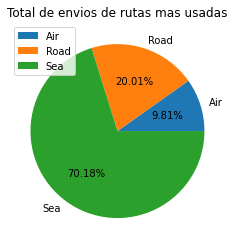

In [26]:
visualruta = rutas.count()['total_value'].sort_values(ascending=False).reset_index(name= 'Uso_de_rutas').head(10)
visualruta.groupby('transport_mode')['Uso_de_rutas'].sum().plot(kind='pie', legend='Reverse', autopct='%.2f%%', title='Total de envios de rutas mas usadas'                                                           )
plt.ylabel('')

***Rutas mas rentables***

*Para responder la pregunta, filtramos los datos con respecto al origen y destino para sumar sus ganancias asi deducir que implementar o apostar a por la rutas que dejan mas dinero seria una buena opcion en pocas palabras aumentar el trafico en las siguientes rutas.*

In [40]:
rutaRen = df.groupby(['origin','destination'])[['total_value']].sum().sort_values(by= 'total_value',ascending=False).head(10)
rutaRen.rename({'total_value': 'Total_Ganancia'}, axis=1)

Total_Ganancia
origin      destination                   
China       Mexico             12494000000
Canada      Mexico              8450000000
South Korea Vietnam             6877007000
China       Japan               5891000000
Japan       Mexico              5829000000
France      Belgium             5538069000
            United Kingdom      5427000000
China       South Korea         4790000000
South Korea Japan               4741000000
USA         Mexico              4710000000

Text(0.5, 0, 'Suma de ganacia por paises')

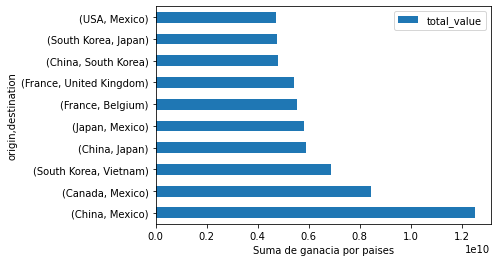

In [50]:
df.groupby(['origin','destination'])[['total_value']].sum().sort_values(by= 'total_value',ascending=False).head(10).plot(kind ='barh',legend='Reverse')
plt.xlabel('Suma de ganacia por paises')

### Opcion 2 

*Comenzamos agrupando los medios de transporte para luego contar sun ganancias totales de cada una, aqui podemos 
notar que predomina el transporte por mar.*

In [60]:
transport = df.groupby(['transport_mode'])[['total_value']].sum().sort_values(by= 'total_value',ascending=False)
transport = transport.rename({'total_value': 'Total_Ganancia'}, axis=1)
transport

,Total_Ganancia
transport_mode,
Sea,100530622000
Rail,43628043000
Air,38262147000
Road,33270486000


In [71]:
from collections import Counter
title_words = list(df["transport_mode"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('Sea', 10688), ('Rail', 3381), ('Road', 2598), ('Air', 2389)]

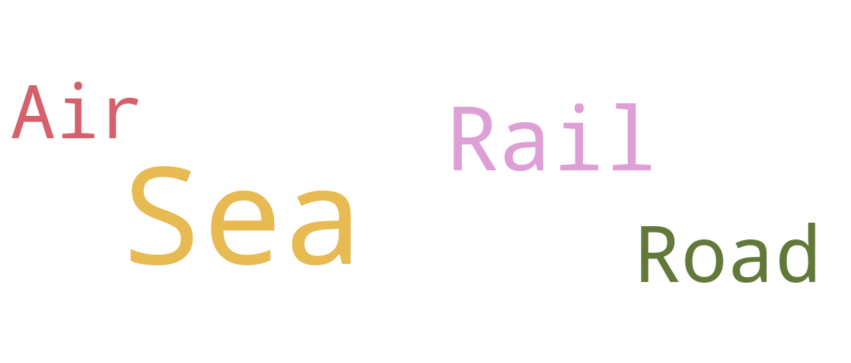

In [78]:
import wordcloud
wc = wordcloud.WordCloud(
    width=1200,
    height=500,
    collocations=False,
    background_color="white",
    colormap="tab20b",
  
).generate(" ".join(title_words))
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
_ = plt.axis("off")

### Opcion 3

***Exportaciones***

*agrupamos los origenes ya que son los que exportan sumando las ganancia de cada pais exportador.*

In [83]:
export = df.groupby('origin')

In [102]:
export.sum()['total_value'].sort_values(ascending=False).reset_index(name= 'Ganancia en exportaciones').head(9)

,origin,Ganancia en exportaciones
0,China,45210046000
1,USA,23646306000
2,Japan,20042976000
3,France,19930332000
4,South Korea,18510146000
5,Germany,15593233000
6,Russia,14074000000
7,Canada,11253000000
8,Italy,6634684000


*En la siguiente grafica podemos ver que  primeros 9 paises nos dan el 80% en exportaciones*

Text(0.5, 1.0, 'Paises que generan un 80% en exportaciones')

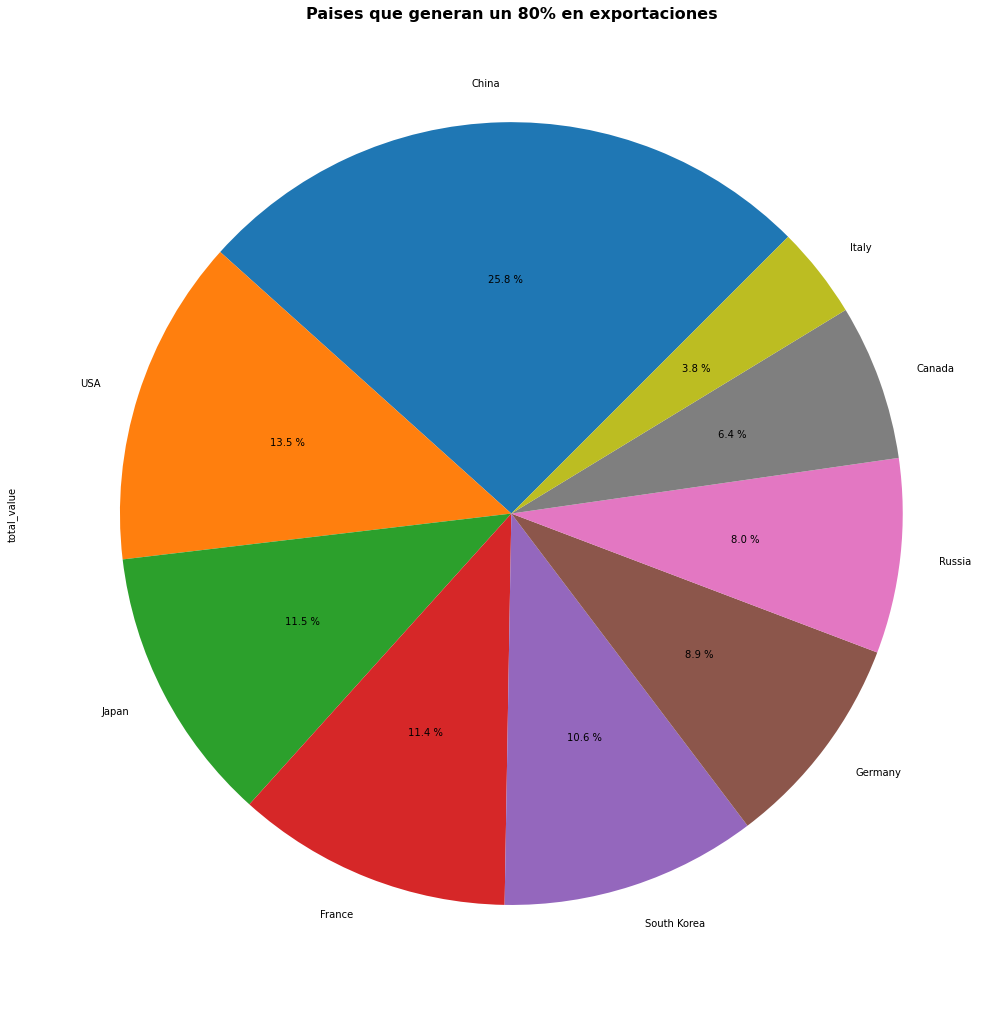

In [93]:
ax =visualexport.sum()['total_value'].sort_values(ascending=False).head(9).plot.pie(
    startangle=45,
    autopct='%.1f %%',
    figsize=(20, 18)
)
ax.set_title("Paises que generan un 80% en exportaciones",
             fontsize=16, weight="bold")

***Importaciones***

*agrupamos los origenes ya que son los que exportan sumando las ganancia de cada pais importador.*

In [96]:
Import = df.groupby('destination')

In [100]:
Import.sum()['total_value'].sort_values(ascending=False).reset_index(name= 'Ganancia en importacion').head(6)

,destination,Ganancia en importacion
0,Mexico,37209015000
1,USA,16917409000
2,Germany,16412451000
3,Japan,14605152000
4,Thailand,14082000000
5,China,13831992000


*En la siguiente grafica podemos ver que  primeros 6 paises nos dan el 80% en importaciones*

Text(0.5, 1.0, 'Paises que generan un 80% en importaciones')

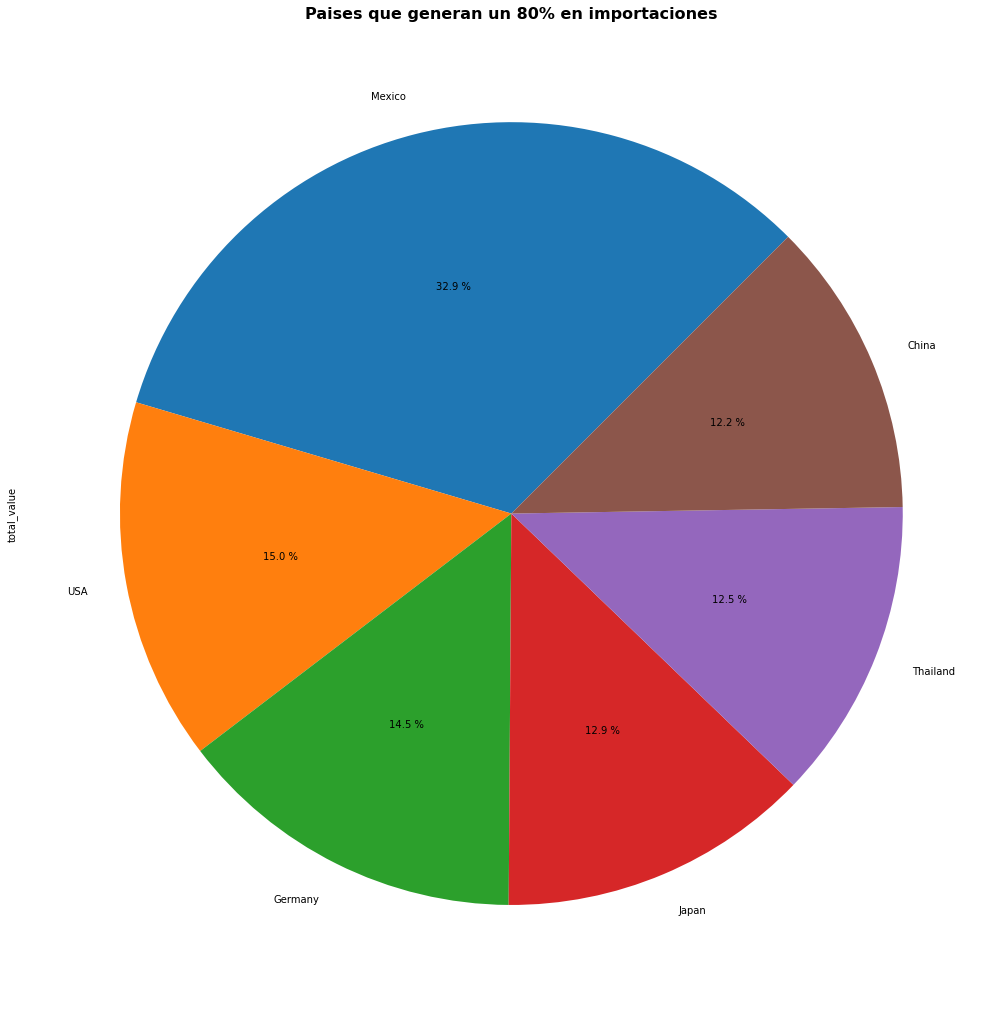

In [101]:
ax =Import.sum()['total_value'].sort_values(ascending=False).head(6).plot.pie(
    startangle=45,
    autopct='%.1f %%',
    figsize=(20, 18)
)
ax.set_title("Paises que generan un 80% en importaciones",
             fontsize=16, weight="bold")